<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_Linear_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__) 

2.9.2


In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load in data
data = load_breast_cancer()

In [4]:
# Check the type of data
type(data)

sklearn.utils.Bunch

In [5]:
# IT is a Bunch object
# this basicaly acts like a dictionary where you can reat the keays like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 'data' the attribute means the input data
data.data.shape

(569, 30)

In [7]:
# 'target'
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# There are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
# you can also deterine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# Split the data into train and test sets
# This lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.33)
N, D = X_train.shape

In [12]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation = 'sigmoid')

model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100)

# Evaluate the model - evalute() return loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 36ms/step - loss: 0.9074 - accuracy: 0.3281 - val_loss: 0.8977 - val_accuracy: 0.3457
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8184 - accuracy: 0.4016 - val_loss: 0.8129 - val_accuracy: 0.4894
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7429 - accuracy: 0.4987 - val_loss: 0.7375 - val_accuracy: 0.5798
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6785 - accuracy: 0.6089 - val_loss: 0.6721 - val_accuracy: 0.6277
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6222 - accuracy: 0.6929 - val_loss: 0.6177 - val_accuracy: 0.7128
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5745 - accuracy: 0.7612 - val_loss: 0.5723 - val_accuracy: 0.7766
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5343 - accuracy: 0.7953 - val_loss: 0.5333 - val_accuracy: 0.7979
Epoch 8/100

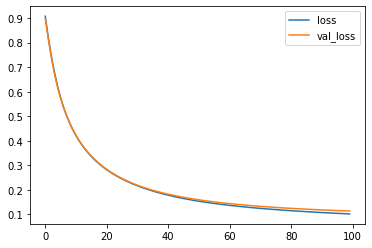

In [14]:
# Plot what's returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

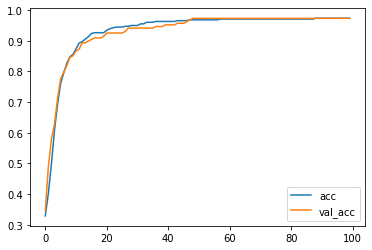

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()